In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/heart.csv")
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
data_final=data.drop(["age","slope"],axis=1)
print(data_final)

     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  thal  \
0      1   3       145   233    1        0      150      0      2.3   0     1   
1      1   2       130   250    0        1      187      0      3.5   0     2   
2      0   1       130   204    0        0      172      0      1.4   0     2   
3      1   1       120   236    0        1      178      0      0.8   0     2   
4      0   0       120   354    0        1      163      1      0.6   0     2   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...  ..   ...   
298    0   0       140   241    0        1      123      1      0.2   0     3   
299    1   3       110   264    0        1      132      0      1.2   0     3   
300    1   0       144   193    1        1      141      0      3.4   2     3   
301    1   0       130   131    0        1      115      1      1.2   1     3   
302    0   1       130   236    0        0      174      0      0.0   1     2   

     target  
0         1  

In [4]:
data_final[["sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","ca","thal"]]=data_final[["sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","ca","thal"]].replace(0,np.nan)
print(data_final)

     sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   ca  \
0    1.0  3.0       145   233  1.0      NaN      150    NaN      2.3  NaN   
1    1.0  2.0       130   250  NaN      1.0      187    NaN      3.5  NaN   
2    NaN  1.0       130   204  NaN      NaN      172    NaN      1.4  NaN   
3    1.0  1.0       120   236  NaN      1.0      178    NaN      0.8  NaN   
4    NaN  NaN       120   354  NaN      1.0      163    1.0      0.6  NaN   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...  ...   
298  NaN  NaN       140   241  NaN      1.0      123    1.0      0.2  NaN   
299  1.0  3.0       110   264  NaN      1.0      132    NaN      1.2  NaN   
300  1.0  NaN       144   193  1.0      1.0      141    NaN      3.4  2.0   
301  1.0  NaN       130   131  NaN      1.0      115    1.0      1.2  1.0   
302  NaN  1.0       130   236  NaN      NaN      174    NaN      NaN  1.0   

     thal  target  
0     1.0       1  
1     2.0       1  
2     2.0      

<Axes: >

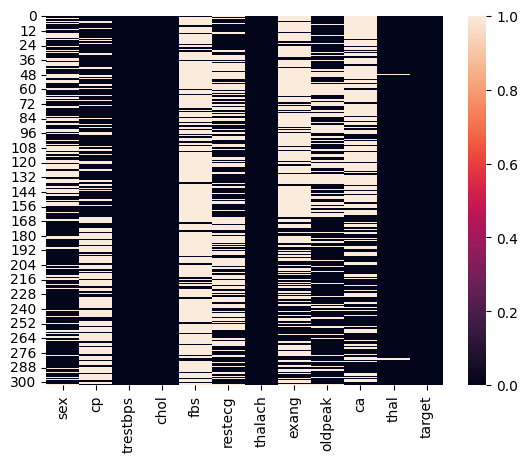

In [5]:
sns.heatmap(data_final.isnull())

In [6]:
data_final.fillna({'sex':data_final['sex'].mean()},inplace=True)
data_final.fillna({'cp':data_final['cp'].mean()},inplace=True)
data_final.fillna({'trestbps':data_final['trestbps'].mean()},inplace=True)
data_final.fillna({'chol':data_final['chol'].mean()},inplace=True)
data_final.fillna({'fbs':data_final['fbs'].mean()},inplace=True)
data_final.fillna({'restecg':data_final['restecg'].mean()},inplace=True)
data_final.fillna({'thalach':data_final['thalach'].mean()},inplace=True)
data_final.fillna({'exang':data_final['exang'].mean()},inplace=True)
data_final.fillna({'oldpeak':data_final['oldpeak'].mean()},inplace=True)
data_final.fillna({'ca':data_final['ca'].mean()},inplace=True)
data_final.fillna({'thal':data_final['thal'].mean()},inplace=True)


<Axes: >

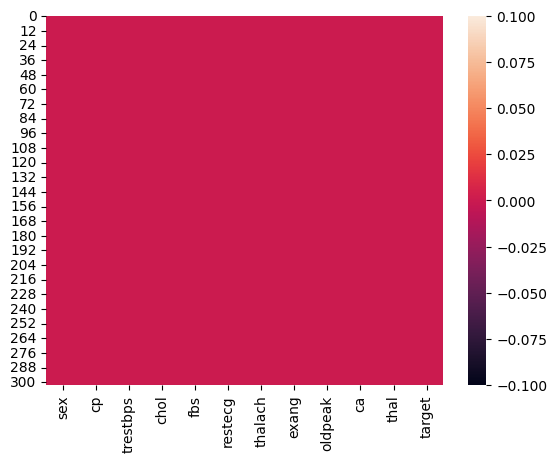

In [7]:
sns.heatmap(data_final.isnull())

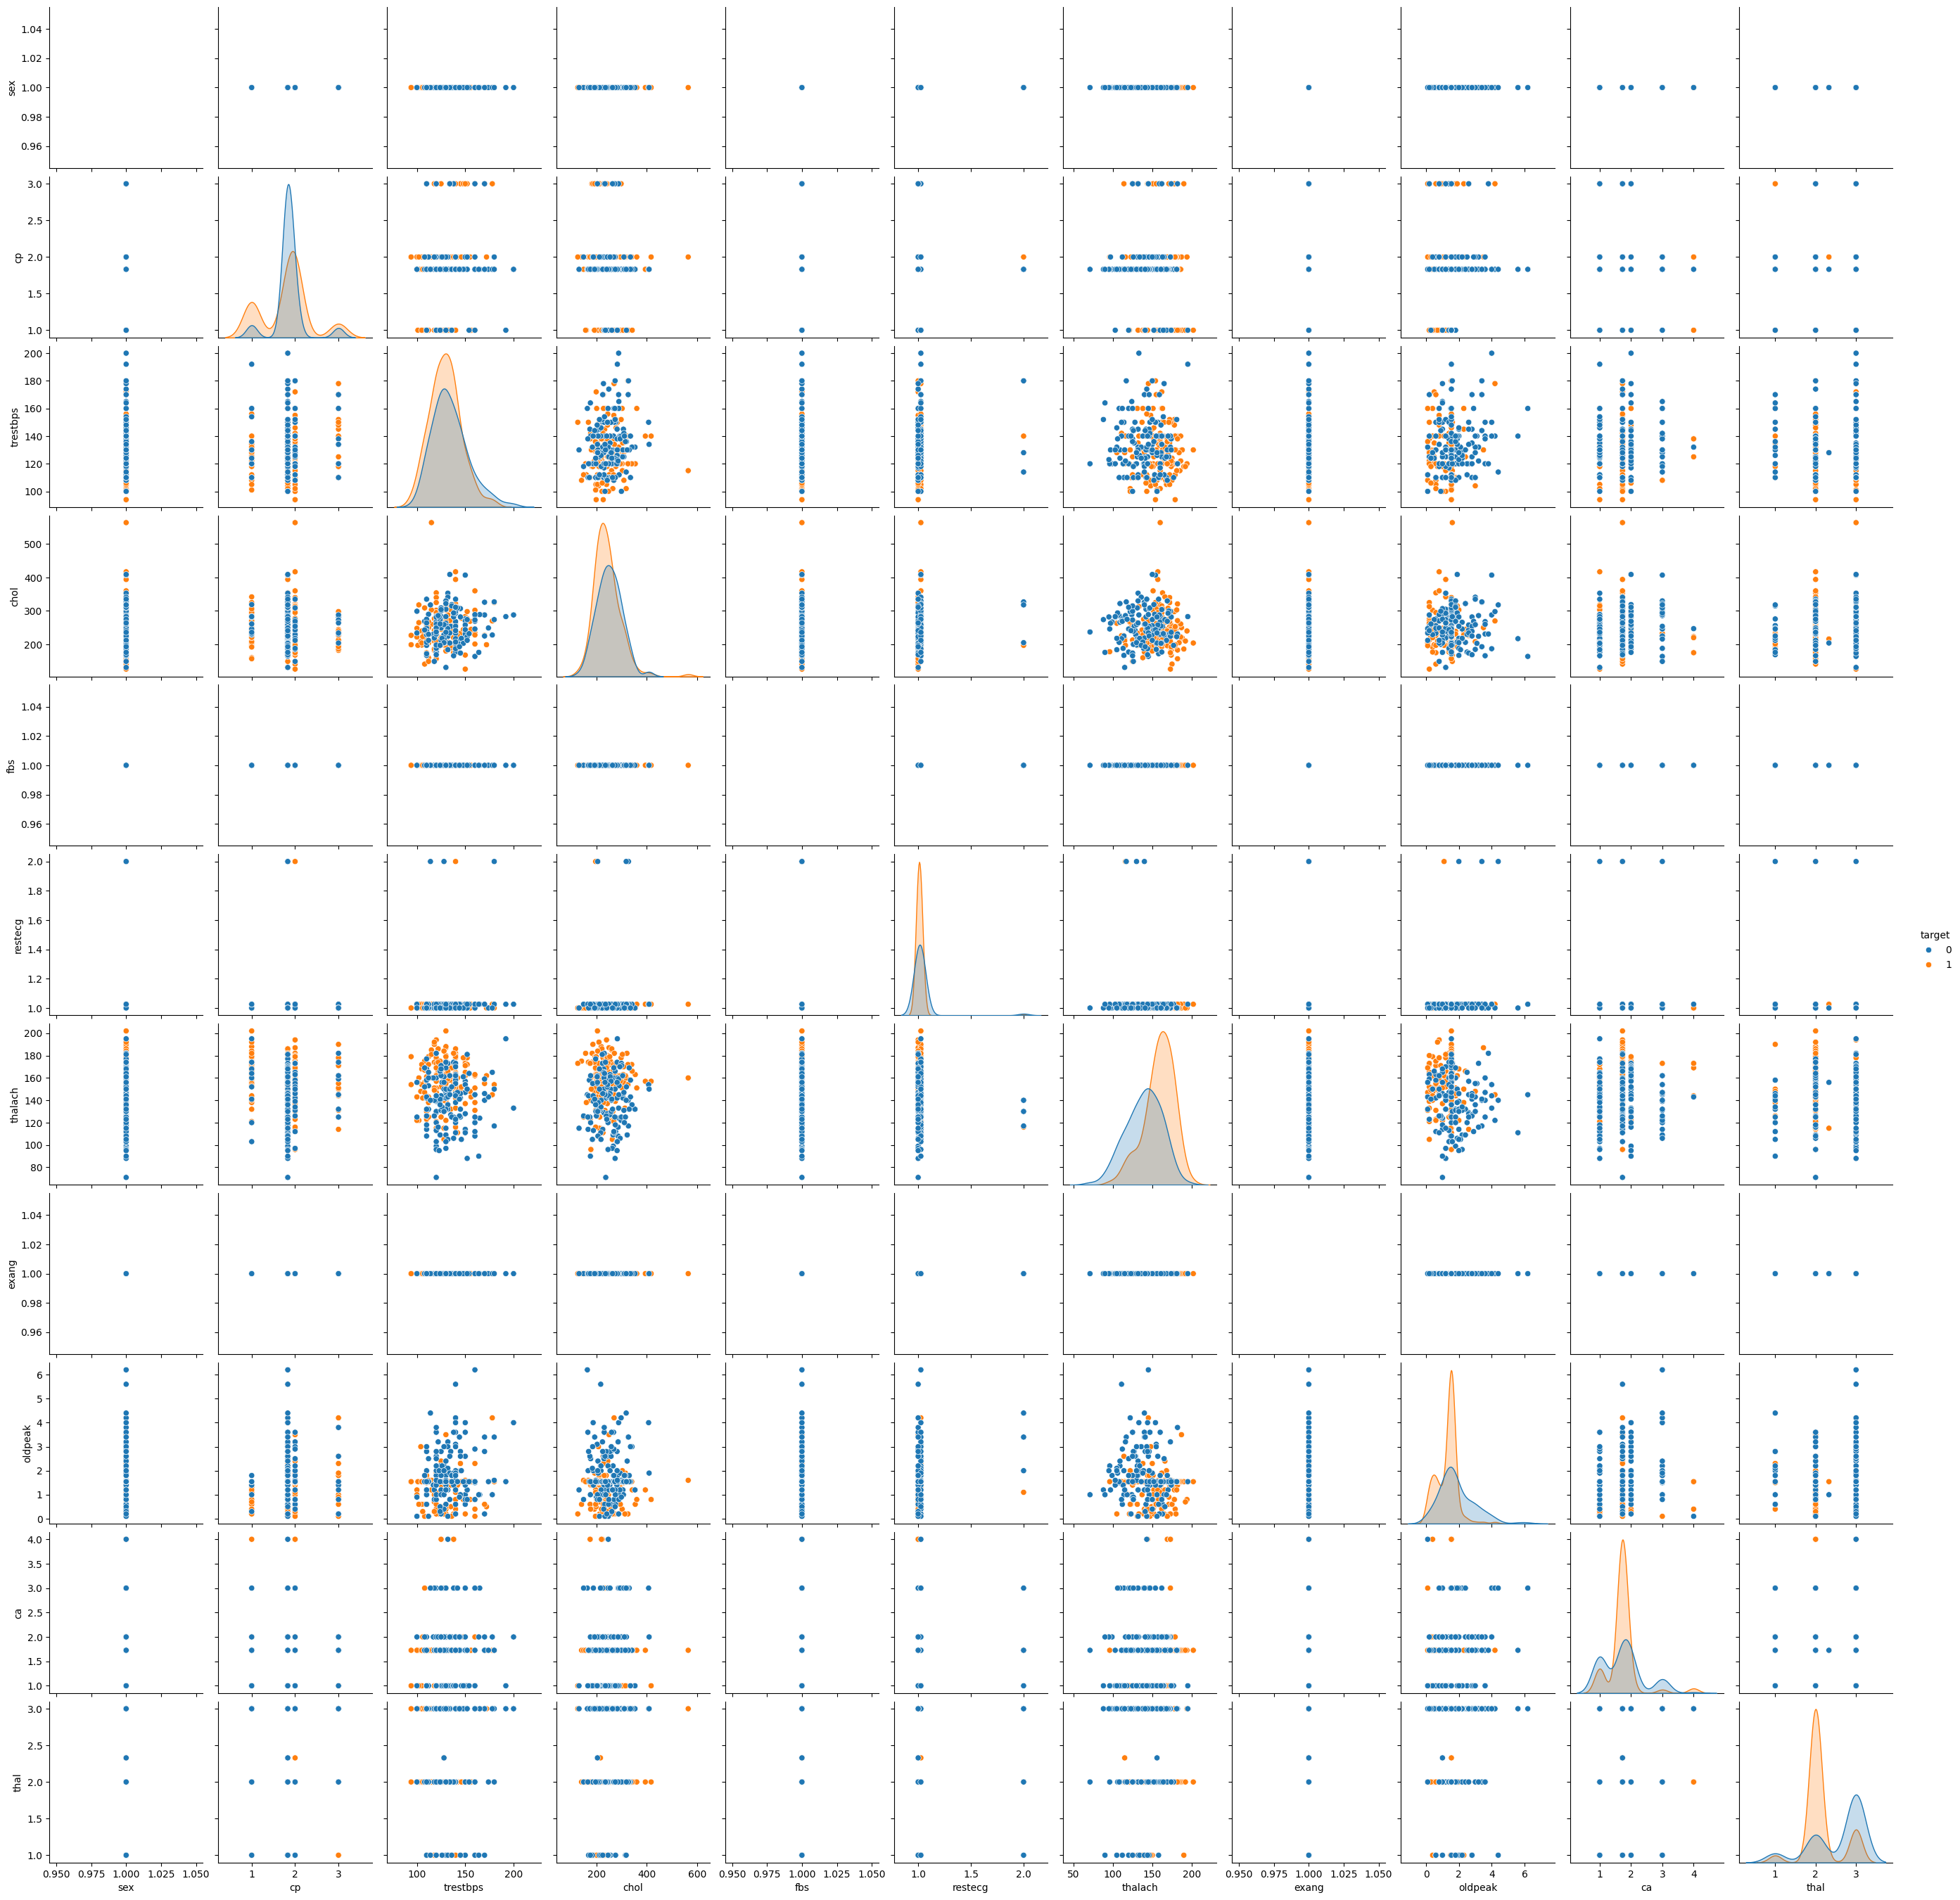

In [8]:
sns.pairplot(data_final,hue="target")

In [9]:
x=data_final.iloc[:,:-1].values
y=data_final.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
print(x_test.shape)


(61, 11)


In [12]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression(max_iter=2000)
logm.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=(accuracy_score(y_test,logm.predict(x_test)))
print(ac)

0.8688524590163934


<Axes: >

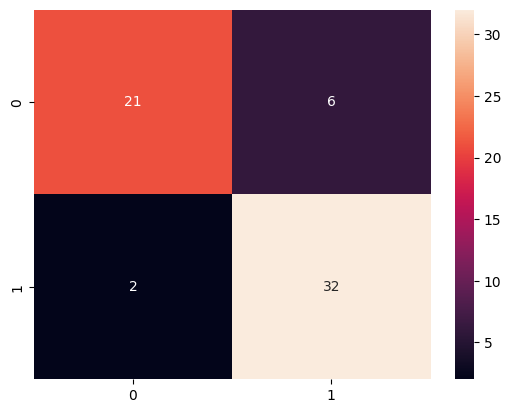

In [14]:
sns.heatmap(confusion_matrix(y_test,logm.predict(x_test)),annot=True)

In [15]:
logm_cr=classification_report(y_test,logm.predict(x_test))
print(logm_cr)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



**KNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
acknn=accuracy_score(y_test,knn.predict(x_test))
print(acknn)

0.6065573770491803


<Axes: >

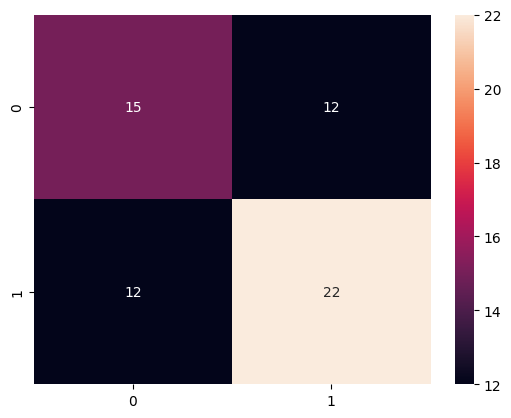

In [18]:

sns.heatmap(confusion_matrix(y_test,knn.predict(x_test)),annot=True)

In [19]:
crknn=classification_report(y_test,knn.predict(x_test))
print(crknn)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        27
           1       0.65      0.65      0.65        34

    accuracy                           0.61        61
   macro avg       0.60      0.60      0.60        61
weighted avg       0.61      0.61      0.61        61



**Naive Bayse**

In [20]:
import sklearn
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [21]:
acnb=accuracy_score(y_test,nb.predict(x_test))
print(acnb)

0.7868852459016393


<Axes: >

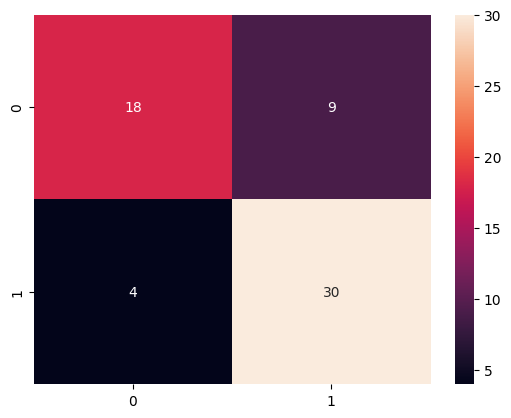

In [22]:
sns.heatmap(confusion_matrix(y_test,nb.predict(x_test)),annot=True)

In [23]:
crnb=classification_report(y_test,nb.predict(x_test))
print(crnb)

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.77      0.88      0.82        34

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



**SVM**

In [24]:
from sklearn.svm import SVC
svmmodel=SVC(kernel="linear")
svmmodel.fit(x_train,y_train)

SVC(kernel='linear')

In [25]:
acsvm=accuracy_score(y_test,svmmodel.predict(x_test))
print(acsvm)

0.8524590163934426


<Axes: >

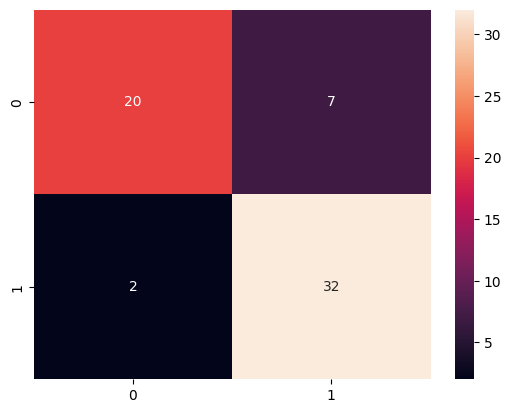

In [26]:
sns.heatmap(confusion_matrix(y_test,svmmodel.predict(x_test)),annot=True)

In [27]:
crsvm=classification_report(y_test,svmmodel.predict(x_test))
print(crsvm)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



**Decision** **Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
dtac=accuracy_score(y_test,dt.predict(x_test))
print(dtac)

0.7377049180327869


<Axes: >

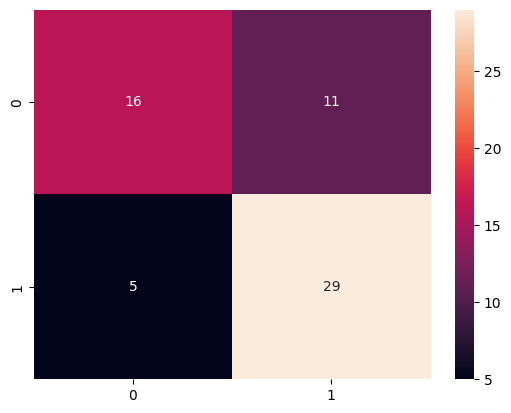

In [30]:
sns.heatmap(confusion_matrix(y_test,dt.predict(x_test)),annot=True)

In [31]:
dtcr=classification_report(y_test,dt.predict(x_test))
print(dtcr)

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        27
           1       0.72      0.85      0.78        34

    accuracy                           0.74        61
   macro avg       0.74      0.72      0.73        61
weighted avg       0.74      0.74      0.73        61



**Random** **Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
acrf0=accuracy_score(y_test,rf.predict(x_test))
print(acrf0)

0.8524590163934426


<Axes: >

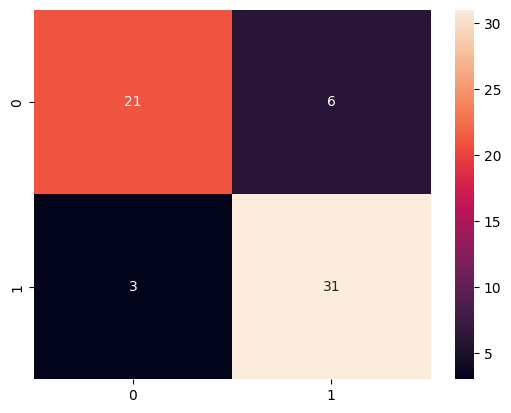

In [34]:
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test)),annot=True)

In [35]:
crrf=classification_report(y_test,rf.predict(x_test))
print(crrf)

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

